<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [28]:
import numpy as np

def sum_prod(X, V):
    result = np.zeros(X[0].shape)
    for matrix, vector in zip(X, V):
        product = np.dot(matrix, vector)
        result += product
    return result

def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [1]]), np.array([[2], [2]])]
    expected_result = np.array([[25], [37]])
    assert np.allclose(sum_prod(X, V), expected_result), "Тест не прошёл"
    print("Тест прошёл успешно!")

test_sum_prod()

Тест прошёл успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [29]:
import numpy as np

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    test_matrix = np.array([[0.1, 0.6], [0.3, 0.8]])
    expected_result = np.array([[0, 1], [0, 1]])
    assert np.allclose(binarize(test_matrix), expected_result), "Тест не прошёл"
    print("Тест прошёл успешно!")

test_binarize()

Тест прошёл успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [30]:
def unique_rows(mat):
    unique_elements = []
    for row in mat:
        seen = set()
        unique_row = []
        for element in row:
            if element not in seen:
                unique_row.append(element)
                seen.add(element)
        unique_elements.append(unique_row)
    return unique_elements

def unique_columns(mat):
    transposed_mat = list(zip(*mat))
    unique_elements = []
    for column in transposed_mat:
        seen = set()
        unique_col = []
        for element in column:
            if element not in seen:
                unique_col.append(element)
                seen.add(element)
        unique_elements.append(unique_col)
    return unique_elements

def test_unique_rows():
    matrix = [[1, 2, 3, 2], [4, 5, 6, 5], [7, 8, 9, 8]]
    expected_result = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    assert unique_rows(matrix) == expected_result, "Тест для строк не прошёл"
    print("Тест для строк прошёл успешно!")

def test_unique_columns():
    matrix = [[1, 4, 7], [2, 5, 8], [3, 6, 9], [2, 5, 8]]
    expected_result = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    assert unique_columns(matrix) == expected_result, "Тест для столбцов не прошёл"
    print("Тест для столбцов прошёл успешно!")

test_unique_rows()
test_unique_columns()

Тест для строк прошёл успешно!
Тест для столбцов прошёл успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

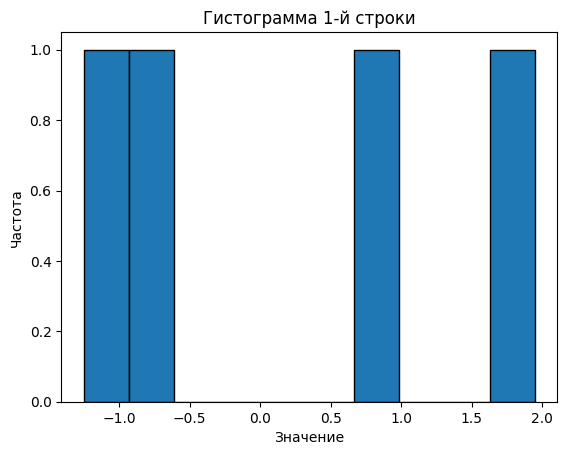

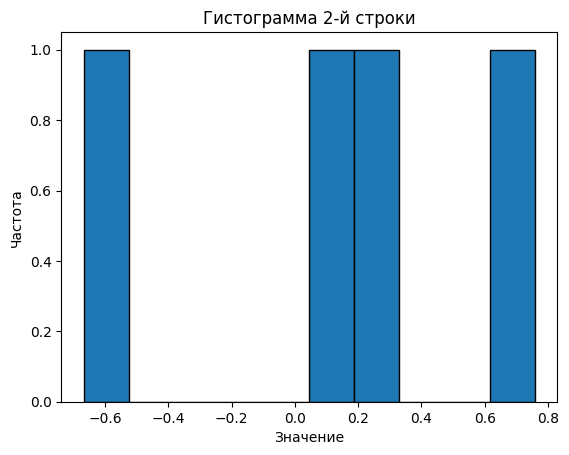

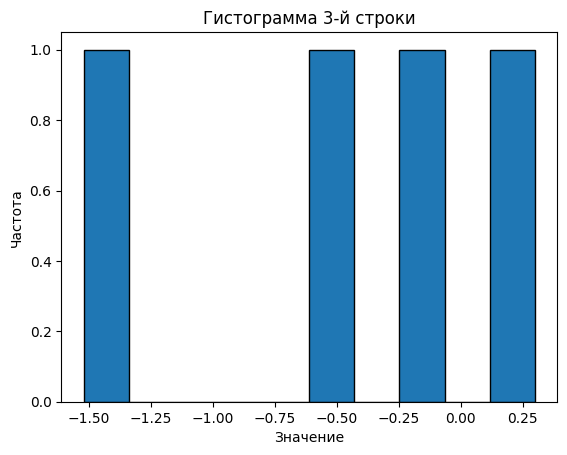

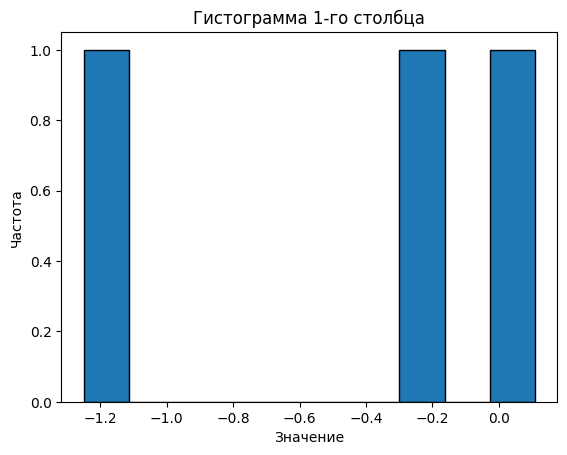

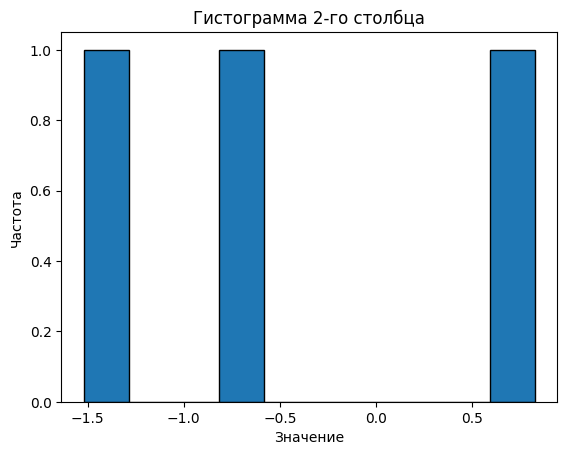

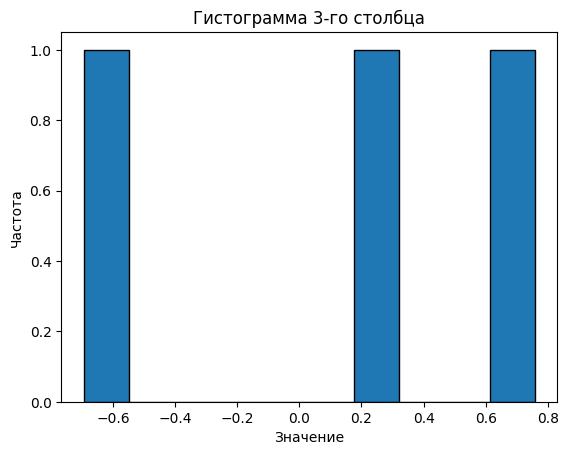

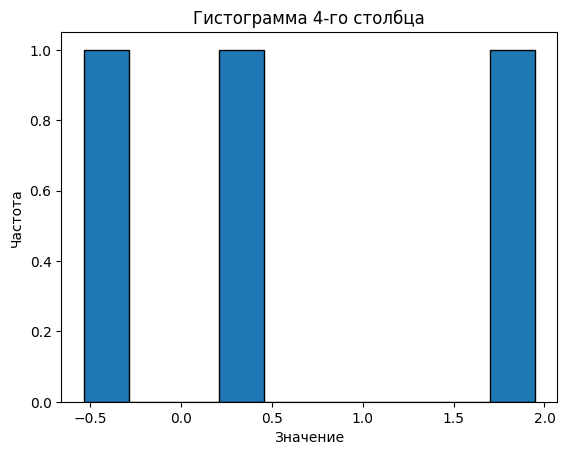

Матрица:
[[-1.24944688  0.8251954  -0.69375338  1.94630411]
 [ 0.10811025 -0.66651973  0.75781527  0.23251759]
 [-0.17817096 -1.5198639   0.29855704 -0.53631894]]
Математическое ожидание строк: [ 0.20707481  0.10798084 -0.48394919]
Математическое ожидание столбцов: [-0.43983586 -0.45372941  0.12087298  0.54750092]
Дисперсия строк: [1.58498462 0.25941134 0.44541955]
Дисперсия столбцов: [0.34139449 0.93919038 0.36696107 1.07684345]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_analyze_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    row_means = np.mean(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    row_vars = np.var(matrix, axis=1)
    col_vars = np.var(matrix, axis=0)

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, edgecolor='black')
        plt.title(f'Гистограмма {i+1}-й строки')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, edgecolor='black')
        plt.title(f'Гистограмма {j+1}-го столбца')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.show()

    return matrix, row_means, col_means, row_vars, col_vars

matrix, row_means, col_means, row_vars, col_vars = generate_and_analyze_matrix(3, 4)
print("Матрица:")
print(matrix)
print("Математическое ожидание строк:", row_means)
print("Математическое ожидание столбцов:", col_means)
print("Дисперсия строк:", row_vars)
print("Дисперсия столбцов:", col_vars)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [32]:
def chess(m, n, a, b):
    matrix = []
    for i in range(m):
        row = []
        for j in range(n):
            if (i + j) % 2 == 0:
                row.append(a)
            else:
                row.append(b)
        matrix.append(row)
    return matrix

def test_chess():
    test_matrix = chess(3, 3, 1, 0)
    expected_result = [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
    assert test_matrix == expected_result, "Тест не прошёл"
    print("Тест прошёл успешно!")

test_chess()

Тест прошёл успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3), dtype=np.int32) * background_color
    for i in range(min(a, m)):
        for j in range(min(b, n)):
            image[i, j] = rectangle_color
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=np.int32) * background_color
    x0, y0 = m // 2, n // 2
    for x in range(m):
        for y in range(n):
            if ((x - x0) ** 2 / a ** 2 + (y - y0) ** 2 / b ** 2) <= 1:
                image[x, y] = ellipse_color
    return image

def test_draw_rectangle():
    image = draw_rectangle(5, 3, 10, 10, (255, 0, 0), (255, 255, 255))
    assert np.all(image[:5, :3] == (255, 0, 0)), "Тест для прямоугольника не прошёл"
    print("Тест для прямоугольника прошёл успешно!")

def test_draw_ellipse():
    image = draw_ellipse(3, 4, 10, 10, (0, 0, 255), (255, 255, 255))
    assert np.all(image[5, 5] == (0, 0, 255)), "Тест для овала не прошёл"
    print("Тест для овала прошёл успешно!")

test_draw_rectangle()
test_draw_ellipse()

Тест для прямоугольника прошёл успешно!
Тест для овала прошёл успешно!


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [34]:
import numpy as np

def analyze_time_series(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)

    local_maxima = []
    local_minima = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            local_maxima.append(i)
        elif series[i] < series[i - 1] and series[i] < series[i + 1]:
            local_minima.append(i)

    moving_average = []
    for i in range(len(series) - p + 1):
        window = series[i:i + p]
        moving_average.append(np.mean(window))

    return mean, variance, std_dev, local_maxima, local_minima, moving_average

series = np.array([1, 3, 2, 4, 5, 3, 6, 4])
p = 3
mean, variance, std_dev, local_maxima, local_minima, moving_average = analyze_time_series(series, p)

print("Математическое ожидание:", mean)
print("Дисперсия:", variance)
print("СКО:", std_dev)
print("Локальные максимумы:", local_maxima)
print("Локальные минимумы:", local_minima)
print("Скользящее среднее:", moving_average)

Математическое ожидание: 3.5
Дисперсия: 2.25
СКО: 1.5
Локальные максимумы: [1, 4, 6]
Локальные минимумы: [2, 5]
Скользящее среднее: [np.float64(2.0), np.float64(3.0), np.float64(3.6666666666666665), np.float64(4.0), np.float64(4.666666666666667), np.float64(4.333333333333333)]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [35]:
import numpy as np

def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    return one_hot

labels = [0, 2, 3, 0]
encoded_labels = one_hot_encoding(labels)
print(encoded_labels)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
